# AIFFEL 대전 1기 Exploration_03 고양이 수염 스티커 만들기
# <프로젝트 순서>
## 0. 사진 불러오기
## 1. 얼굴 검출 & 랜드마크 검출하기
## 2. 스티커 적용 위치 확인하기
## 3. 스티커 적용하기
## 4. 다양한 원본 이미지에 대한 고찰
## 5. 마무리하며...

# 0. 사진 불러오기

In [1]:
# 필요한 모듈 불러오기
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

### os.getenv: os 모듈을 이용해 로컬에 있는 사진의 경로를 my_image_path 변수에 저장
### cv2,imread: opencv의 cv2 모듈을 불러와 imread 메소드를 이용해 로컬 경로에 있는 이미지를 읽어온다
### cv2.resize: 읽어온 이미지를 사이즈 조정을 해준다. 여기서는 640\*360의 VGA 크기 (16:9)로 고정했다.
### img_show: 출력용으로 사용할 이미지는 .copy() 메소드를 이용해 별도 보관한다.
### plt.imshow, plt.show: 이미지를 출력

이미지 경로는:  /home/aiffel/1.AIFFEL_Study/Exploration/E03_sticker_camera/image2.jpg


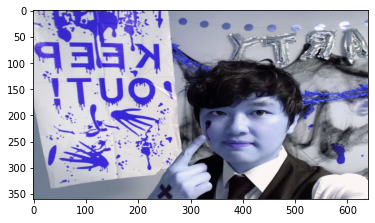

In [2]:
my_image_path = os.getenv('HOME')+'/1.AIFFEL_Study/Exploration/E03_sticker_camera/image2.jpg'
print('이미지 경로는: ', my_image_path)
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

### 위의 사진은 opencv특성상 BGR 이미지 채널을 사용하기 때문에 푸른빛이 돈다.
#### (원본 사진에서 붉은색은 푸른색으로, 푸른색은 붉은색으로 표현됨)
### cv2.COLOR_BGR2RGB: BGR -> RGB 변경

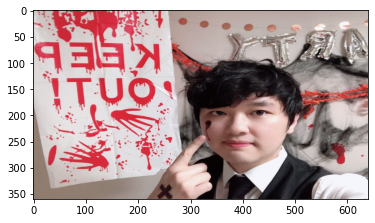

In [3]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# 1. 얼굴 검출 & 랜드마크 검출하기
### dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾기

### dlib를 활용해 hog detector 선언

In [4]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
print("detector 선언")

detector 선언


### detector를 이용해서 얼굴의 bounding box를 추출
### detector_hog 메소드의 두 번째 인자 1은 이미지 피라미드의 수
#### 이미지 피라미드: 이미지를 upsampling 방법을 통해 크기를 키우는 것
### 이미지 피라미드에서 얼굴을 다시 검출하면 작게 촬영된 얼굴을 크게 볼 수 있기 때문에 더 정확한 검출이 가능!

In [5]:
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("경계박스 추출")

경계박스 추출


### 찾은 얼굴 출력
#### 초록색 경계박스를 확인할 수 있다.

rectangles[[(339, 153) (468, 282)]]


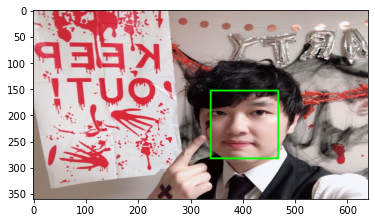

In [6]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 2. 스티커 적용 위치 확인하기

### 저장한 landmark 모델을 불러온다.

In [7]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print('landmark 모델 불러오기 성공!')

landmark 모델 불러오기 성공!


### list_landmarks라는 빈 리스트를 만든 후
### 반복문을 통해 이미지에서 찾아진 얼굴 개수마다 반복하면 list_landmark에 68개의 랜드마크가 얼굴 개수만큼 저장

In [8]:
list_landmarks = []
for dlib_rect in dlib_rects:
    '''
    RGB이미지, dlib.rectangle을 입력받아 dlib.full_object_detection 반환
    map함수를 이용해 (a,b) -> points.part()에서 x와 y를 추출해 list_points = [ (x1, y1), (x2, y2), ... , (x68, y68) ] 만들고
    append를 이용해 list_landmarks라는 리스트에 추가. 즉 list_landmarks = [ [ (x1, y1), (x2, y2), ... , (x68, y68) ] ]
    
    ''' 
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


In [9]:
# list_landmarks 확인
print(list_landmarks[0])
print('list_landmarks의 길이는: ', len(list_landmarks))
print(list_landmarks)

[(332, 201), (332, 217), (332, 233), (335, 249), (341, 263), (352, 274), (364, 283), (378, 291), (394, 293), (412, 291), (432, 285), (452, 277), (468, 265), (478, 249), (483, 231), (486, 212), (488, 193), (332, 187), (341, 180), (353, 178), (366, 179), (379, 182), (400, 182), (415, 177), (431, 175), (448, 177), (462, 184), (388, 197), (387, 207), (385, 217), (383, 227), (373, 237), (380, 239), (387, 240), (396, 239), (405, 237), (344, 197), (353, 194), (362, 194), (372, 200), (361, 201), (352, 200), (414, 200), (424, 194), (434, 193), (445, 196), (435, 200), (424, 201), (363, 253), (372, 250), (381, 248), (388, 250), (395, 248), (408, 251), (424, 255), (408, 260), (395, 262), (388, 262), (380, 261), (372, 258), (367, 254), (381, 254), (388, 255), (395, 255), (419, 255), (395, 254), (388, 254), (380, 253)]
list_landmarks의 길이는:  1
[[(332, 201), (332, 217), (332, 233), (335, 249), (341, 263), (352, 274), (364, 283), (378, 291), (394, 293), (412, 291), (432, 285), (452, 277), (468, 265), (

### 랜드마크 영상 출력

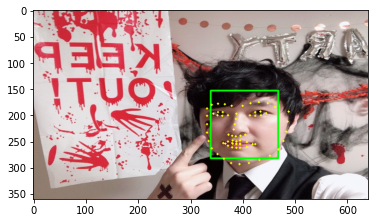

In [10]:
# 랜드마크 68개가 노란 점으로 잘 표현된 것으로 확인했다.
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 3. 스티커 적용하기

### 고양이 수염은 코 끝에 위치해야 하므로 <span style="color:red">33번</span>을 활용하면 된다.
### 수염 이미지의 중앙점은 landamark[33]의 0,1번째 값으로 구성 = (387, 240)
### 수염이 얼굴에 잘 맞아야 하므로 resize를 해줘야 한다. w,h 변수에 경계박스의 너비(.width 메소드 이용)를 할당

![face detection](https://aiffelstaticprd.blob.core.windows.net/media/original_images/E-8-8.png)

In [11]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print ('코끝의 위치: ', landmark[33]) # nose edge index : 33
    x = landmark[33][0] # 수염의 중앙 x좌표값
    y = landmark[33][1] # 수염의 중앙 y좌표값
    w = dlib_rect.width() # 수염 스티커 resize를 위한 경계박스 너비
    h = dlib_rect.width() # 수염 스티커 resize를 위한 경계박스 높이
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

코끝의 위치:  (387, 240)
(x,y) : (387,240)
(w,h) : (130,130)


## 수염 이미지 불러오기

In [12]:
import os
sticker_path = os.getenv('HOME')+'/1.AIFFEL_Study/Exploration/E03_sticker_camera/cat-whiskers.png'
print('수염 이미지 경로: ', sticker_path)
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

수염 이미지 경로:  /home/aiffel/1.AIFFEL_Study/Exploration/E03_sticker_camera/cat-whiskers.png
(130, 130, 3)


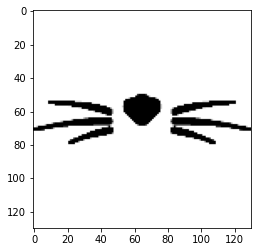

In [13]:
plt.imshow(img_sticker)

### 수염 스티커의 좌측 상단 좌표값과, 우측 하단 좌표값 설정 = 스티커가 들어갈 영역
### 좌측 상단 = (left_top_x, left_top_y)
### 우측 상단 = (right_bottom_x, right_bottom_y)

In [14]:
left_top_x = x - img_sticker.shape[0] // 2
right_bottom_x = x + img_sticker.shape[0] // 2
left_top_y = y - img_sticker.shape[1] // 2
right_bottom_y = y + img_sticker.shape[1] // 2

print('(left_top_x, left_top_y): ', (left_top_x, left_top_y)) # 수염 이미지 좌측 상단의 x,y 좌표값
print('(right_bottom_x, right_bottom_y): ', (right_bottom_x, right_bottom_y)) # 수염 이미지 우측 하단의 x,y 좌표값

(left_top_x, left_top_y):  (322, 175)
(right_bottom_x, right_bottom_y):  (452, 305)


### 스티커 영역 설정 및 np.where 활용해 원 이미지에 스티커 입히기!
#### <span style="color:blue">※ np.where(고양이 수염 픽셀이 0(검정)이면, 스티커 이미지를 할당, 검정색이 아니라면 원 이미지를 할당)</span>

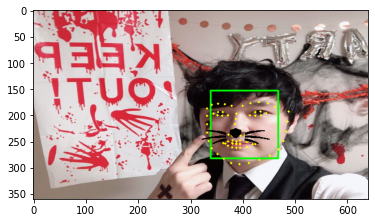

In [15]:
sticker_area = img_show[left_top_y:right_bottom_y, left_top_x:right_bottom_x]
img_show[left_top_y:right_bottom_y, left_top_x:right_bottom_x] = np.where(img_sticker==0,img_sticker, sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

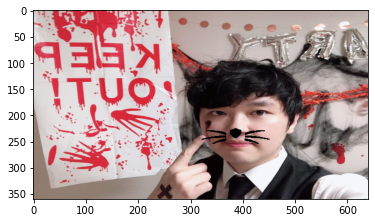

In [16]:
sticker_area = img_bgr[left_top_y:right_bottom_y, left_top_x:right_bottom_x]
img_bgr[left_top_y:right_bottom_y, left_top_x:right_bottom_x] = np.where(img_sticker==0,img_sticker, sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 4. 다양한 원본 이미지에 대한 고찰

## 동일 인물에 대해 얼굴각도, 이미지 밝기, 촬영거리 등의 변수에 따른 영향도 분석
### [첫 번째 시도] 배우 박정민 측면과 정면
## >> 결과: resize에 따라 경계박스 위치가 변경되는 것은 확인했으나 얼굴 인식이 제대로 안 됨.

# 4-1-1. 배우 박정민 측면 사진
## 1st try 이미지 사이즈 = (640,480)

이미지 경로는:  /home/aiffel/1.AIFFEL_Study/Exploration/E03_sticker_camera/park_right.jpeg


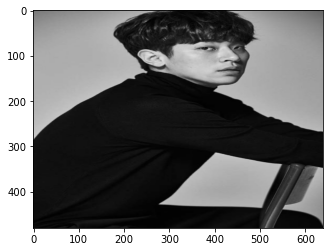

In [17]:
# 원본 이미지 불러오기
my_image_path = os.getenv('HOME')+'/1.AIFFEL_Study/Exploration/E03_sticker_camera/park_right.jpeg'
print('이미지 경로는: ', my_image_path)
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 480))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(339, 153) (468, 282)]]


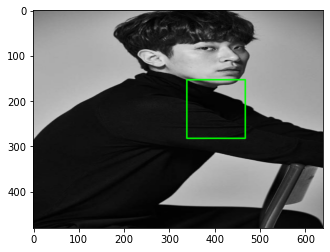

In [18]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

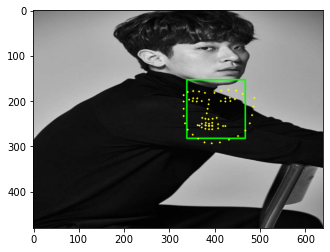

In [19]:
# 랜드마크 출력
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 2nd try 이미지 사이즈 = (640,360)

이미지 경로는:  /home/aiffel/1.AIFFEL_Study/Exploration/E03_sticker_camera/park_right.jpeg


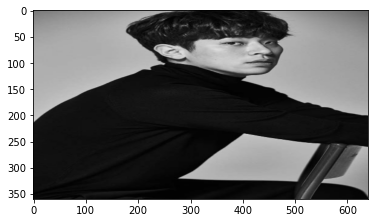

In [20]:
# 원본 이미지 불러오기
my_image_path = os.getenv('HOME')+'/1.AIFFEL_Study/Exploration/E03_sticker_camera/park_right.jpeg'
print('이미지 경로는: ', my_image_path)
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(339, 153) (468, 282)]]


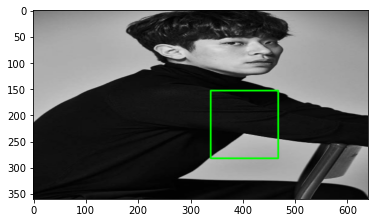

In [21]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

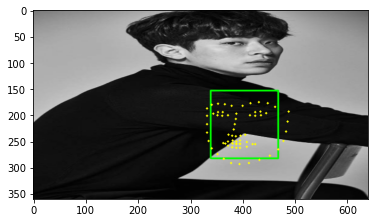

In [22]:
# 랜드마크 출력
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## >> 측면 사진으로 시도해보려고 했지만... 경계박스를 잘 잡지  못했다.
##      랜드마크도 좌측으로 잡혔다.
##      그리고 흑백 사진이라서 더 힘든것 같아 컬러사진으로 변경해서 진행.

# 4-1-2. 배우 박정민 정면 사진

이미지 경로는:  /home/aiffel/1.AIFFEL_Study/Exploration/E03_sticker_camera/park_front.jpg


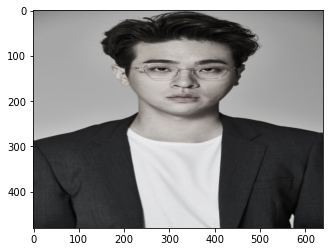

In [23]:
# 원본 이미지 불러오기
my_image_path = os.getenv('HOME')+'/1.AIFFEL_Study/Exploration/E03_sticker_camera/park_front.jpg'
print('이미지 경로는: ', my_image_path)
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 480))    # Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(339, 153) (468, 282)]]


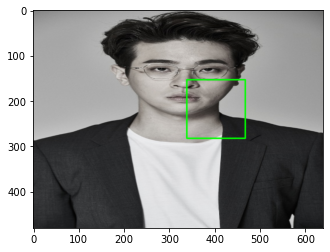

In [24]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

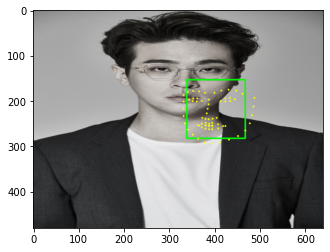

In [25]:
# 랜드마크 출력
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## >> 정면 사진도 경계박스를 제대로 찾지 못했다.

## 4-2. 조니 뎁
### [두 번째 시도] 배우 조니 뎁
## >> 결과: resize에 따라 경계박스 위치가 변경되는 것은 확인했으나 얼굴 인식이 제대로 안 됨.

## 1st try = (640, 480)

이미지 경로는:  /home/aiffel/1.AIFFEL_Study/Exploration/E03_sticker_camera/jd.jpeg


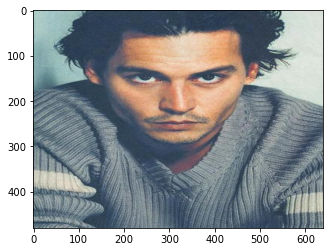

In [26]:
# 원본 이미지 불러오기
my_image_path = os.getenv('HOME')+'/1.AIFFEL_Study/Exploration/E03_sticker_camera/jd.jpeg'
print('이미지 경로는: ', my_image_path)
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 480))    # Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(339, 153) (468, 282)]]


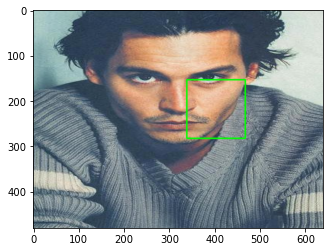

In [27]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

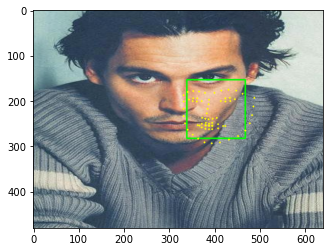

In [28]:
# 랜드마크 출력
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 2nd try = (600, 600)

이미지 경로는:  /home/aiffel/1.AIFFEL_Study/Exploration/E03_sticker_camera/jd.jpeg


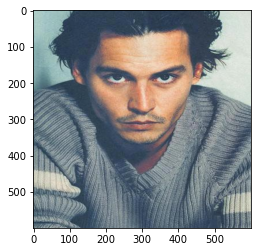

In [29]:
# 원본 이미지 불러오기
my_image_path = os.getenv('HOME')+'/1.AIFFEL_Study/Exploration/E03_sticker_camera/jd.jpeg'
print('이미지 경로는: ', my_image_path)
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (600, 600))    # Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(339, 153) (468, 282)]]


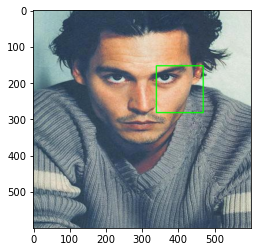

In [30]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

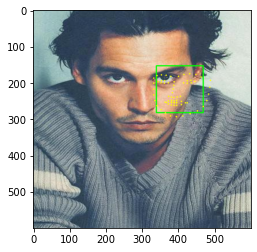

In [31]:
# 랜드마크 출력
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## >> 정말 다양한 사이즈로 시도를 했으나...
##      얼굴이 정확히 인식이 되지 않았다...
##      마지막으로 한 번만 더 해보자
##      남성만 했으니 여성을 해보도록 하자.

## 4-3. 수지
### [세 번째 시도] 수지
## >> 결과: resize에 따라 경계박스 위치가 변경되는 것은 확인했으나 얼굴 인식이 제대로 안 됨.🤪

이미지 경로는:  /home/aiffel/1.AIFFEL_Study/Exploration/E03_sticker_camera/suzi.jpg


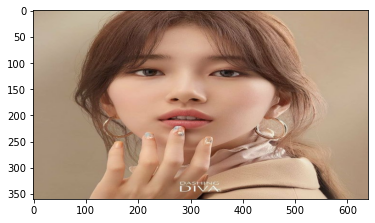

In [32]:
# 원본 이미지 불러오기
my_image_path = os.getenv('HOME')+'/1.AIFFEL_Study/Exploration/E03_sticker_camera/suzi.jpg'
print('이미지 경로는: ', my_image_path)
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(339, 153) (468, 282)]]


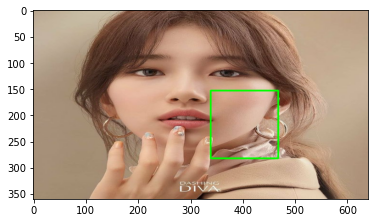

In [33]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

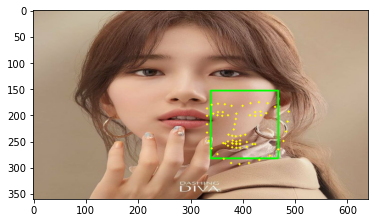

In [34]:
# 랜드마크 출력
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 4-4. 셀카
## 정말 마지막으로 셀카로 시도
### >> 결과: 연예인 사진보다 얼굴에 가깝게 인식은 되지만 고양이 수염 장착에 사용한 사진보다는 정확도가 떨어짐
###                측면이라서 더 인식이 어렵다고 생각됨.

이미지 경로는:  /home/aiffel/1.AIFFEL_Study/Exploration/E03_sticker_camera/pic1.JPG


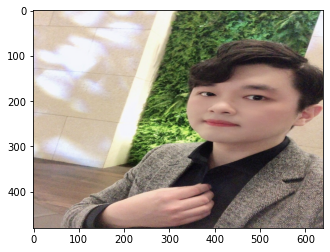

In [35]:
# 원본 이미지 불러오기
my_image_path = os.getenv('HOME')+'/1.AIFFEL_Study/Exploration/E03_sticker_camera/pic1.JPG'
print('이미지 경로는: ', my_image_path)
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 480))    # Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(339, 153) (468, 282)]]


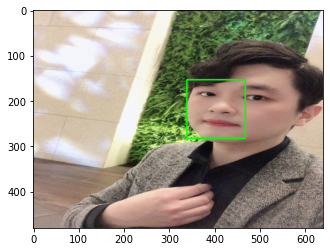

In [36]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

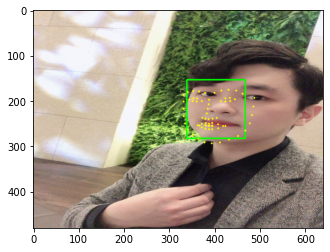

In [37]:
# 랜드마크 출력
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 5. 마무리하며...

# 루브릭 평가문항
## 1. 자기만의 카메라앱 기능 구현을 완수하였다.
### >> 원본 사진에 스티커 사진이 원하는 곳에 잘 합성되었다!
## 2. 스티커 이미지를 정확한 원본 위치에 반영하였다.
### >> 고양이 수염이 코 부분에 잘 위치했다!
## 3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.
### >> 총 3명의 연예인과 본인 셀카를 이용했다. 측면과 정면, 흑백 이미지를 사용했으나 얼굴 인식이 잘 되지 않아서 resize
### 를 통해 얼굴인식을 시도했으나 다양한 시도에도 원본 이미지에 있는 얼굴에 완벽히 딱 맞게는 힘들었다!

## 이번 탐험노드는 이미지 처리 관련 노드였는데 평소 이미지 처리에 관심이 많이 있는 편이라 좀 더 깊게 생각해보고 알아봤던 시간이었다.
## 특히 np.where의 경우 처음에는 생소했는데 개념을 충분히 생각하고 조원들과 토의하며 집단지성의 힘을 빌린 결과 원리를 하나하나 깨닫게 되었다.
## 그리고 색을 표현할 때 0~255라는 숫자를 통해 한다는 사실을 알고 있으면서 정작 예제에서 사용될 때는 한눈에 알아차리지 못했다. np.where를 사용시 img_sticker == 0이라는 표현에서 0이 검정색을 뜻하는 것을 나중에 알았다.
## 하지만 그런 시간을 거치면서 하나하나 세포에 기억될 것이다. 이제 점점 이미지 처리 분야에 대한 기초 체력이 올라가는 느낌이다.
## 무엇보다 같이 과제를 진행하는 우리 조원분들의 적극적인 참여가 있어 더 자극이 된다. 질문 하나에도 같이 고민해주고 서로 도움이 되기 위해 치열하게 참여해준다!
## 앞으로도 상호보완적인 관계를 계속 이어나가길 바라며 다음 탐험노드도 기대된다.